<a href="https://colab.research.google.com/github/CodeX-Addy/Brain_Tumor_Detection/blob/main/RES_NET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the dataset so to give input to model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

img_dir = '/content/drive/MyDrive/BTdsYesNo/'

dataset_path = os.listdir(img_dir)

dataset_category = os.listdir(img_dir)
print (dataset_category)  #what kinds of data are in this dataset

print("Types of data found: ", len(dataset_path))



['yes', 'no']
Types of data found:  2


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Building the dataframe**

In [ ]:
# !jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [ ]:
dataset = []

for item in dataset_category:
    # Get all the file names
    all_data = os.listdir(img_dir + '/' +item)

    print(all_data)

 # Add them to the list
    for images in all_data:
        dataset.append((item, str(img_dir+ '/' +item) + '/' + images))
        # print(dataset)

['y1279.jpg', 'y1406.jpg', 'y1320.jpg', 'y1388.jpg', 'y127.jpg', 'y1395.jpg', 'y1253.jpg', 'y1232.jpg', 'y1451.jpg', 'y1397.jpg', 'y1188.jpg', 'y1175.jpg', 'y1413.jpg', 'y1441.jpg', 'y1415.jpg', 'y1277.jpg', 'y166.jpg', 'y1428.jpg', 'y1268.jpg', 'y1312.jpg', 'y1310.jpg', 'y1233.jpg', 'y1035.jpg', 'y1077.jpg', 'y1228.jpg', 'y1055.jpg', 'y1123.jpg', 'y1387.jpg', 'y1216.jpg', 'y160.jpg', 'y1182.jpg', 'y1042.jpg', 'y1418.jpg', 'y1416.jpg', 'y1432.jpg', 'y1431.jpg', 'y1001.jpg', 'y1322.jpg', 'y167.jpg', 'y1468.jpg', 'y1189.jpg', 'y1311.jpg', 'y1455.jpg', 'y187.jpg', 'y1373.jpg', 'y162.jpg', 'y150.jpg', 'y1168.jpg', 'y1303.jpg', 'y179.jpg', 'y1007.jpg', 'y1244.jpg', 'y1047.jpg', 'y197.jpg', 'y19.jpg', 'y183.jpg', 'y1020.jpg', 'y189.jpg', 'y1337.jpg', 'y1385.jpg', 'y1090.jpg', 'y1062.jpg', 'y1209.jpg', 'y1420.jpg', 'y1011.jpg', 'y1327.jpg', 'y1270.jpg', 'y1185.jpg', 'y1317.jpg', 'y1033.jpg', 'y1330.jpg', 'y1469.jpg', 'y1379.jpg', 'y1299.jpg', 'y1264.jpg', 'y128.jpg', 'y1472.jpg', 'y1390.jpg',

In [ ]:
# Build a dataframe        

tumor_df = pd.DataFrame(data=dataset, columns=['Tumor', 'image'])
print(tumor_df.head())
print(tumor_df.tail())

  Tumor                                            image
0   yes  /content/drive/MyDrive/BTdsYesNo//yes/y1279.jpg
1   yes  /content/drive/MyDrive/BTdsYesNo//yes/y1406.jpg
2   yes  /content/drive/MyDrive/BTdsYesNo//yes/y1320.jpg
3   yes  /content/drive/MyDrive/BTdsYesNo//yes/y1388.jpg
4   yes   /content/drive/MyDrive/BTdsYesNo//yes/y127.jpg
     Tumor                                            image
2995    no  /content/drive/MyDrive/BTdsYesNo//no/no1155.jpg
2996    no  /content/drive/MyDrive/BTdsYesNo//no/no1230.jpg
2997    no   /content/drive/MyDrive/BTdsYesNo//no/no292.jpg
2998    no  /content/drive/MyDrive/BTdsYesNo//no/no1140.jpg
2999    no  /content/drive/MyDrive/BTdsYesNo//no/no1316.jpg


In [ ]:
# Let's check how many samples for each category are present
print("Total number of images are there in the dataset: ", len(tumor_df))

images_count = tumor_df['Tumor'].value_counts()

print("Images in each category: ")
print(images_count)

Total number of images are there in the dataset:  3000
Images in each category: 
yes    1500
no     1500
Name: Tumor, dtype: int64


**Data Processing**

In [ ]:
import cv2
from PIL import Image



In [ ]:
no_tumor = os.listdir(img_dir + 'no')

#check if it did it perfectly
print(no_tumor)

['no1491.jpg', 'no1073.jpg', 'no1222.jpg', 'no1433.jpg', 'no1119.jpg', 'no252.jpg', 'no1352.jpg', 'no167.jpg', 'no266.jpg', 'no264.jpg', 'no1234.jpg', 'no1354.jpg', 'no1489.jpg', 'no282.jpg', 'no1270.jpg', 'no1335.jpg', 'no143.jpg', 'no1136.jpg', 'no265.jpg', 'no1213.jpg', 'no1111.jpg', 'no1148.jpg', 'no272.jpg', 'no1098.jpg', 'no1392.jpg', 'no109.jpg', 'no1247.jpg', 'no1126.jpg', 'no1287.jpg', 'no1388.jpg', 'no1313.jpg', 'no1240.jpg', 'no1122.jpg', 'no1488.jpg', 'no262.jpg', 'no1095.jpg', 'no271.jpg', 'no1064.jpg', 'no154.jpg', 'no235.jpg', 'no1466.jpg', 'no243.jpg', 'no1495.jpg', 'no288.jpg', 'no1373.jpg', 'no1185.jpg', 'no1471.jpg', 'no233.jpg', 'no1256.jpg', 'no1282.jpg', 'no1118.jpg', 'no1415.jpg', 'no1272.jpg', 'no1191.jpg', 'no1456.jpg', 'no254.jpg', 'no1461.jpg', 'no1176.jpg', 'no240.jpg', 'no22.jpg', 'no1190.jpg', 'no1402.jpg', 'no1298.jpg', 'no1418.jpg', 'no1244.jpg', 'no1333.jpg', 'no253.jpg', 'no184.jpg', 'no145.jpg', 'no230.jpg', 'no1314.jpg', 'no1052.jpg', 'no1394.jpg', '

In [ ]:
im_size = 64

dataset = []
label = []

# for i in tumor_df:
#     data_path = img_dir + str(i)  
#     filenames = [i for i in os.listdir(data_path) ]
   
#     for f in filenames:
#         img = cv2.imread(data_path + '/' + f)
#         img = cv2.resize(img, (im_size, im_size))
#         dataset.append(img)
#         label.append(i)


In [ ]:
# check it its a jpg bcz we only needed jpg img only

for i , img_all in enumerate(no_tumor):
    if( img_all.split('.')[1] == 'jpg' ):
        image = cv2.imread( img_dir + 'no/' + img_all)  # selection of only .jpg format
        image = Image.fromarray( image, 'RGB')
        image = image.resize( (im_size,im_size) ) # resizing image 
        dataset.append( np.array(image))
        label.append(0)

In [ ]:
# doing the same for tumor = yes images
yes_tumor = os.listdir(img_dir + 'yes')
for i , img_all in enumerate(yes_tumor):
    if( img_all.split('.')[1] == 'jpg' ):
        image = cv2.imread( img_dir + 'yes/' + img_all)  # selection of only .jpg format
        image = Image.fromarray( image, 'RGB')
        image = image.resize( (im_size,im_size) ) # resizing image 
        dataset.append( np.array(image))
        label.append(1)

In [ ]:
print(len(label))
len(dataset)

3000


3000

In [ ]:
dataset = np.array(dataset)

dataset = dataset.astype('float32') / 255.0
dataset.shape 

(3000, 64, 64, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer


y=tumor_df['Tumor'].values
#print(y[:5])

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
y = y.reshape(-1,1)
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])],remainder='passthrough')
Y=np.array(columnTransformer.fit_transform(y)) #dtype=np.str
Y.shape

(3000, 2)

In [ ]:
# y=y.reshape(-1,1)
# onehotencoder = OneHotEncoder(categorical_features=[0])  #Converted  scalar output into vector output where the correct class will be 1 and other will be 0
# Y= onehotencoder.fit_transform(y)
# Y.shape  #(40, 2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


images, Y = shuffle(dataset, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=0)

In [ ]:
# from sklearn.model_selection import train_test_split
# label = np.array(label)

# x_train , x_test , y_train , y_test = train_test_split( dataset , label, test_size=0.2 , random_state=0)

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2400, 64, 64, 3)
(2400, 2)
(600, 64, 64, 3)
(600, 2)


# RES NET


In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow

from keras.initializers import glorot_uniform
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

In [ ]:

def identity_block(X, f, filters, stage, block):
    """
   
    Arguments:
    X -- input of shape (m, height, width, channel)
    f -- shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Saving the input value.we need this later to add to the output. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    # First layer 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X) # 1,1 is filter size
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)  # normalization on channels
    X = Activation('relu')(X)

      
    # Second layer  (f,f)=3*3 filter by default
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)


    # Third layer
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1')(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value here, and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [ ]:
#Each ResNet block is either 2 layer deep
def ResNet50(input_shape=(64, 64, 3), classes=2):
    """
    Implementation of the ResNet50 architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input) #3,3 padding

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(X) #64 filters of 7*7 
    X = BatchNormalization(axis=3, name='bn_conv1')(X) #batchnorm applied on channels
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X) #window size is 3*3

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    # convolutional_block is a function defined above. Convolutional_block have 3 layers.
    #filters=[64, 64, 256] first 64 is for 1st layer and 2nd 64 is for 2nd layer and 256 is for 3rd layer of convultional block   
    # below are the conv layers from convolutional_block function
    #X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)
    #X = Conv2D(F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)
   
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b') 
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)


    ### START CODE HERE ###

    # Stage 3 
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL 
    X = AveragePooling2D((2,2), name="avg_pool")(X)
     ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [ ]:
model = ResNet50(input_shape = (64,64,3), classes = 2)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                           

In [ ]:
model.fit(train_x, train_y, epochs = 6, batch_size = 16)

Epoch 1/6
150/150 [==============================] - 13s 41ms/step - loss: 0.7970 - accuracy: 0.7542
Epoch 2/6
150/150 [==============================] - 6s 41ms/step - loss: 0.3746 - accuracy: 0.8658
Epoch 3/6
150/150 [==============================] - 6s 41ms/step - loss: 0.7224 - accuracy: 0.7950
Epoch 4/6
150/150 [==============================] - 6s 43ms/step - loss: 0.4041 - accuracy: 0.8592
Epoch 5/6
150/150 [==============================] - 6s 41ms/step - loss: 0.2449 - accuracy: 0.9108
Epoch 6/6
150/150 [==============================] - 6s 41ms/step - loss: 0.1375 - accuracy: 0.9592


In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

19/19 [==============================] - 2s 38ms/step - loss: 0.1950 - accuracy: 0.9250
Loss = 0.19504056870937347
Test Accuracy = 0.925000011920929


Input image shape: (1, 64, 64, 3)
1/1 [==============================] - 1s 1s/step
[[0. 1.]]


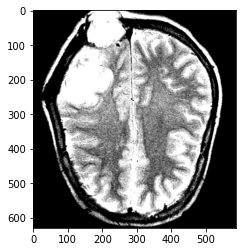

In [ ]:
from matplotlib.pyplot import imread
# from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing import image
import tensorflow as tf
img_path = '/content/drive/MyDrive/BTdsYesNo/yes/y1.jpg'
img = tf.keras.utils.load_img(img_path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
my_image = imread(img_path)
imshow(my_image)
print(model.predict(x))